In [30]:
import pandas as pd

#load the data
df = pd.read_csv('messy_mall_customers.csv')

#Preview the first 5 rows
df.head()

,CustomerID,Gender,Age,Income (k$),Spending Score,JoinDate,Notes,ZipCode
0,1052,F,45,41.21,65,2015-02,loyal customer,110011.0
1,2442,male,22,56.04,43,2018-12,NaN,NaN
2,1352,Male,34,86.52,48,2015-12,discount requested,110011.0
3,1353,Male,29,26.46,65,2015-12,NaN,NaN
4,1579,male,28,38.47,96,2016-08,VIP,NaN


Data cleaning
objective here.
- check for missing values
- Handle duplicates
- Fixing data types
- Cleaning inconsistent entries
- Removing irrelevant columns

In [31]:
#check for missing values
#import libraries
import pandas as pd
missing_values = df.isnull().sum()

print('Missing values in each column')
print(missing_values)

Missing values in each column
CustomerID          0
Gender            193
Age                 0
Income (k$)       102
Spending Score      0
JoinDate          154
Notes             363
ZipCode           655
dtype: int64


In [32]:
#check unique values in Gender
print(df['Gender'].unique())

#standardize Gender column
def clean_gender(g):
    if pd.isnull(g):
        return 'Unknown'
    g = g.strip().lower()
    if g in ['male', 'm']:
        return 'Male'
    elif g in ['female', 'f']:
        return 'Female'
    elif g == 'other':
        return 'Other'
    else:
        return 'Unkown'
df['Gender'] = df['Gender'].apply(clean_gender)

#verify cleaned values
print(df['Gender'].value_counts())

['F' 'male' 'Male' nan 'Female' 'Other' 'M' 'female']
Gender
Female     591
Male       578
Unknown    193
Other      188
Name: count, dtype: int64


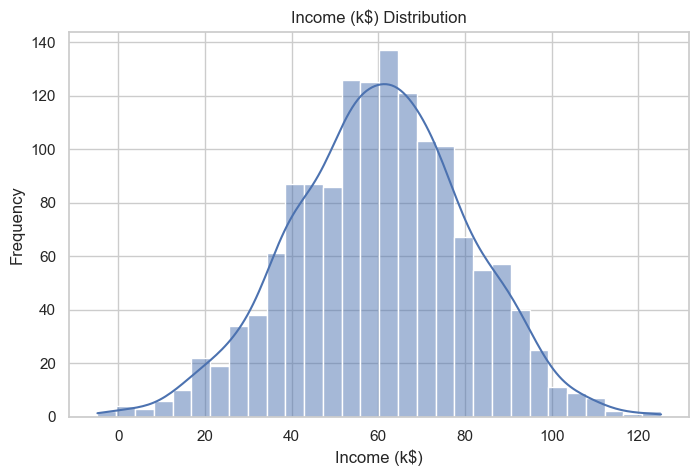

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot income distribution
plt.figure(figsize = (8,5))
sns.histplot(df['Income (k$)'], bins =30, kde = True)
plt.title('Income (k$) Distribution')
plt.xlabel('Income (k$)')
plt.ylabel('Frequency')
plt.show()

In [34]:
#impute missing income values with mean
mean_income = df['Income (k$)'].mean()
df['Income (k$)'] = df['Income (k$)'].fillna(mean_income)

#Confirm all missing values are removed
print(df['Income (k$)'].isnull().sum())

0


#Handling Missing data in JoinDate Column
#We have 154 missing entries and this is likely datetime and could be useful for
#Calculating Customer tenure
#Aalysing cohorts or trends overtime

In [35]:
#convert the JoinDate to datetime format
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors = 'coerce')

#Recheck how many are still missing after Conversion
print(df['JoinDate'].isnull().sum())

154


In [36]:
#We fill missing JoinDate with the most frequent value
mode_JoinDate = df['JoinDate'].mode()[0]
df['JoinDate'].fillna(mode_JoinDate, inplace = True)

#confirm no mor missing values
print(df['JoinDate'].isnull().sum())

0


C:\Users\ELITEX21012G2\AppData\Local\Temp\ipykernel_12228\890021032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JoinDate'].fillna(mode_JoinDate, inplace = True)


In [37]:
#for text columns 
df['Notes'].fillna('No notes', inplace = True)
print(df['Notes'].isnull().sum())

0


C:\Users\ELITEX21012G2\AppData\Local\Temp\ipykernel_12228\2571118027.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Notes'].fillna('No notes', inplace = True)


In [38]:
#taking a decision on how to handle missing values in zipcode
print(df['ZipCode'].unique()[:10])  #first 10 unique values
print(df['ZipCode'].dtype)          #check datatype
print(df['ZipCode'].isnull().sum())

[110011.     nan 400001. 560001.]
float64
655


This column won't contribute meaningfully to your segmentation analysis- and especially since its partially missing and from mixed locations

In [39]:
#Drop ZipCode Column
#df.drop(columns =['ZipCode'], inplace = True)

#print(df.columns.tolist())

In [40]:
#Exploratory data Analysis
print(df.info())

#summary statistics
print(df.describe())

#Gender distribution
print(df['Gender'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1550 non-null   int64         
 1   Gender          1550 non-null   object        
 2   Age             1550 non-null   int64         
 3   Income (k$)     1550 non-null   float64       
 4   Spending Score  1550 non-null   int64         
 5   JoinDate        1550 non-null   datetime64[ns]
 6   Notes           1550 non-null   object        
 7   ZipCode         895 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 97.0+ KB
None
        CustomerID          Age  ...                       JoinDate        ZipCode
count  1550.000000  1550.000000  ...                           1550     895.000000
mean   1753.959355    35.165161  ...  2016-12-05 13:40:20.129032448  359132.731844
min    1001.000000    -5.000000  ...  

Observations
We have annomalies in Age, income, spending score and Gender Distribution 
for example, min age of -5, min income of -4. Max spending score of 300, while the rest are more reasonable. This could be a possible indication of an outlier.
Under Gender Distribution, Female category might have been dropped/misclassified


In [41]:
#clean the age and Income
#Remove unrealistic values from age 
df = df[(df['Age'] > 0) & (df['Age'] <= 100)]

#Remove unrealistic values from Income(k$)
df = df[df['Income (k$)'] >= 0]

#Confirm Cleanup
print(df[['Age', 'Income (k$)']].describe())

               Age  Income (k$)
count  1518.000000  1518.000000
mean     35.215415    60.486444
std       9.855066    19.216458
min       4.000000     0.940000
25%      29.000000    48.397500
50%      35.000000    60.304227
75%      42.000000    72.760000
max      66.000000   125.210000


In [42]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['Female' 'Male' 'Unknown' 'Other']
Gender
Female     576
Male       567
Unknown    189
Other      186
Name: count, dtype: int64


C:\Users\ELITEX21012G2\AppData\Local\Temp\ipykernel_12228\2542102715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =df, x = 'Gender', palette = 'Set2')


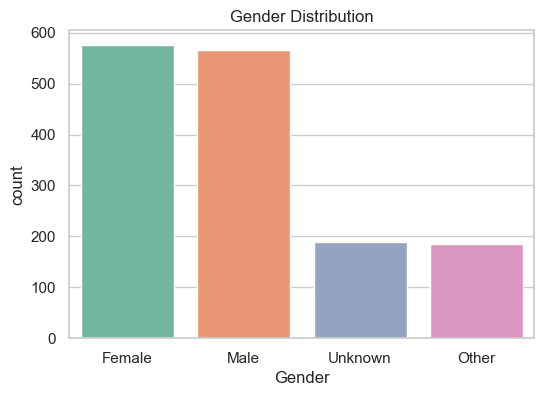

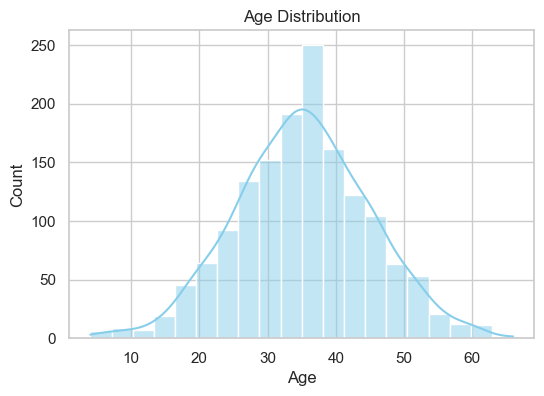

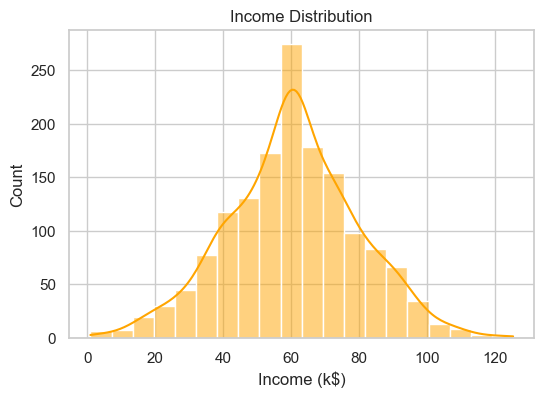

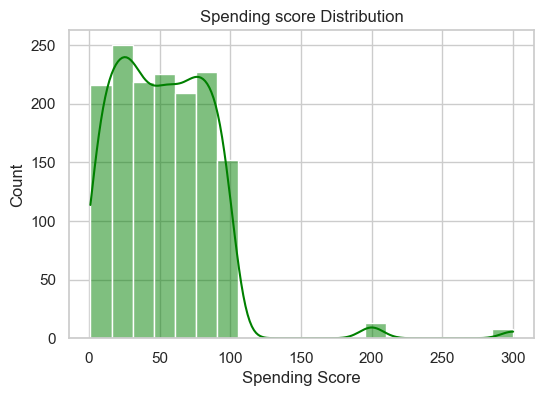

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

#We set visual style for the plots
sns.set(style = 'whitegrid')

# Plot 1: Gender Distribution
plt.figure(figsize= (6,4))
sns.countplot(data =df, x = 'Gender', palette = 'Set2')
plt.title('Gender Distribution')
plt.show()

# Plot 2: Age Distribution
plt.figure(figsize = (6,4))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'skyblue')
plt.title('Age Distribution')
plt.show()

#Plot 3: Income distribution
plt.figure(figsize = (6,4))
sns.histplot(df['Income (k$)'], bins = 20, kde = True, color = 'orange')
plt.title('Income Distribution')
plt.show()

# Plot 4: Spendind Score Distribution
plt.figure(figsize = (6,4))
sns.histplot(df['Spending Score'], bins = 20, kde = True, color = 'green')
plt.title('Spending score Distribution')
plt.show()

Insights
1. This dataset has a concentrated adult population (People in thier 30s and 40s)
2. The highest bar/peak occurs at around 60,000 which suggests its the most common income level in the data set. The spread is mostly between 50k - 70k
3. Majority of customers spend moderately with scores concentrated below 100

In [44]:
#Feature Selection + Scaling
from sklearn.preprocessing import StandardScaler

#Select features
X = df[['Age', 'Income (k$)', 'Spending Score']]

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

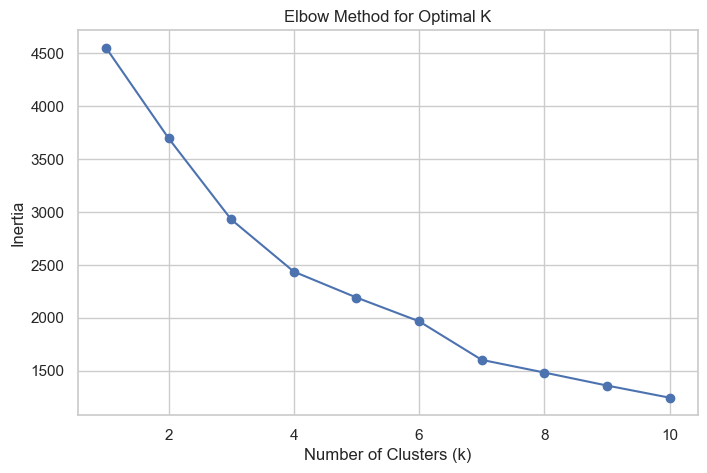

In [45]:
#To find optimal number of clusters for KMEANS, we use the Elbow method 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Test different values of K (number of clusters)
inertia = []
k_range = range(1,11)

for k in k_range:
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize =(8,5))
plt.plot(k_range, inertia, marker ='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

From the plot above, k = 4, where the drop in inertia slows down significantly. This indicates that 4 clusters might be optional.

In [46]:
#Fit KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters= 4, random_state= 42)
clusters = kmeans.fit_predict(x_scaled)

#Add labels
df['Clusters']= clusters

#Preview
df.head()

,CustomerID,Gender,Age,Income (k$),Spending Score,JoinDate,Notes,ZipCode,Clusters
0,1052,Female,45,41.21,65,2015-02-01,loyal customer,110011.0,0
1,2442,Male,22,56.04,43,2018-12-01,No notes,NaN,2
2,1352,Male,34,86.52,48,2015-12-01,discount requested,110011.0,2
3,1353,Male,29,26.46,65,2015-12-01,No notes,NaN,0
4,1579,Male,28,38.47,96,2016-08-01,VIP,NaN,1


In [49]:
#df.columns()
df.head()
#Understanding the clusters
#Group by clusters and calculate statistics
cluster_summary = df.groupby('Cluster')[['Age', 'Income (k$)', 'Spending Score']].mean().round(1)
cluster_summary

KeyError: 'Cluster'